# 0.) Import the Credit Card Fraud Data From CCLE

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [4]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [36]:
df = pd.read_csv("/content/gdrive/MyDrive/ML/fraudTest.csv")

In [37]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


I select four variables like in the previous analysis to give continuity.

In [38]:
df = df[["trans_date_trans_time", "gender", "amt", "city_pop", "is_fraud"]]

In [39]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df["time_var"] = [i.day_of_week for i in df["trans_date_trans_time"]]

<ipython-input-39-f36c414dfed2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])


In [40]:
df.loc[df['time_var'] < 5, 'time_var'] = 0
df.loc[df['time_var'] >= 5, 'time_var'] = 1
df.head()

,trans_date_trans_time,gender,amt,city_pop,is_fraud,time_var
0,2020-06-21 12:14:25,M,2.86,333497,0,1
1,2020-06-21 12:14:33,F,29.84,302,0,1
2,2020-06-21 12:14:53,F,41.28,34496,0,1
3,2020-06-21 12:15:15,M,60.05,54767,0,1
4,2020-06-21 12:15:17,M,3.19,1126,0,1


In [41]:
df = pd.get_dummies(df, prefix = "gender")
df

,trans_date_trans_time,amt,city_pop,is_fraud,time_var,gender_F,gender_M
0,2020-06-21 12:14:25,2.86,333497,0,1,0,1
1,2020-06-21 12:14:33,29.84,302,0,1,1,0
2,2020-06-21 12:14:53,41.28,34496,0,1,1,0
3,2020-06-21 12:15:15,60.05,54767,0,1,0,1
4,2020-06-21 12:15:17,3.19,1126,0,1,0,1
...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,43.77,519,0,0,0,1
555715,2020-12-31 23:59:09,111.84,28739,0,0,0,1
555716,2020-12-31 23:59:15,86.88,3684,0,0,1,0
555717,2020-12-31 23:59:24,7.99,129,0,0,0,1


In [42]:
df = df[['amt', 'city_pop', 'is_fraud','time_var', 'gender_F']]
df = df.rename(columns={'gender_F': 'gender', 'time_var': 'weekend'})
df

,amt,city_pop,is_fraud,weekend,gender
0,2.86,333497,0,1,0
1,29.84,302,0,1,1
2,41.28,34496,0,1,1
3,60.05,54767,0,1,0
4,3.19,1126,0,1,0
...,...,...,...,...,...
555714,43.77,519,0,0,0
555715,111.84,28739,0,0,0
555716,86.88,3684,0,0,1
555717,7.99,129,0,0,0


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [43]:
from sklearn.model_selection import train_test_split

X = df.drop('is_fraud', axis = 1)
y = df.is_fraud

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
X_train.shape

(389003, 4)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [46]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# ros
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

# rus
rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# SMOTE
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models 

In [47]:
from sklearn.linear_model import LogisticRegression

# ros
log_ros = LogisticRegression().fit(X_ros, y_ros)

# rus 
log_rus = LogisticRegression().fit(X_rus, y_rus)

# SMOTE
log_smote = LogisticRegression().fit(X_smote, y_smote)

# 4.) Test the three models

In [48]:
from sklearn.metrics import accuracy_score

# ros
y_pred_ros = log_ros.predict(X_test)
accuracy_ros = accuracy_score(y_test, y_pred_ros)

# rus
y_pred_rus = log_rus.predict(X_test)
accuracy_rus = accuracy_score(y_test, y_pred_rus)

# smote
y_pred_smote = log_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)

# 5.) Which performed best in Out of Sample metrics?

In [49]:
print('Logit ros accuracy:', accuracy_ros*100, "%")
print('Logit rus accuracy:', accuracy_rus*100, "%")
print('Logit smote accuracy:', accuracy_smote*100, "%")

Logit ros accuracy: 16.49751673504643 %
Logit rus accuracy: 16.481921351280022 %
Logit smote accuracy: 16.622279805177666 %


Even though all the accuracy scores are very low, the model with random oversample performed slightly best. Note that the scores with standardization of the values would average around 94%.

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [50]:
raw_temp = pd.concat([X_train, y_train],axis = 1)

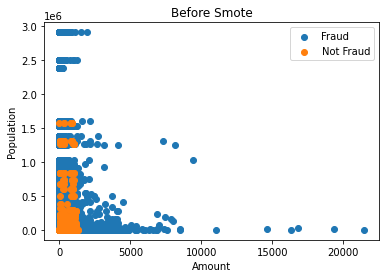

In [53]:
plt.scatter(raw_temp[raw_temp['is_fraud'] == 0]['amt'], raw_temp[raw_temp['is_fraud'] == 0]['city_pop'])
plt.scatter(raw_temp[raw_temp['is_fraud'] == 1]['amt'], raw_temp[raw_temp['is_fraud'] == 1]['city_pop'])
plt.legend(['Fraud', 'Not Fraud'])
plt.xlabel('Amount')
plt.ylabel('Population')
plt.title('Before Smote')
plt.show()

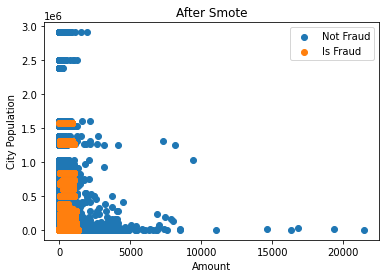

In [52]:
smote_data_temp = pd.concat([X_smote, y_smote], axis =1)

plt.scatter(smote_data_temp[smote_data_temp['is_fraud']==0]['amt'], smote_data_temp[smote_data_temp['is_fraud']==0]['city_pop'])
plt.scatter(smote_data_temp[smote_data_temp['is_fraud']==1]['amt'], smote_data_temp[smote_data_temp['is_fraud']==1]['city_pop'])
plt.legend(['Not Fraud', 'Is Fraud'])
plt.xlabel('Amount')
plt.ylabel('City Population')
plt.title('After Smote')
plt.show()